In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
dfOD = pd.read_excel('/content/drive/MyDrive/cs2704project-main/OlympicsPerformance/athlete_events.xlsx',)

In [5]:
dfCD = pd.read_excel('/content/drive/MyDrive/countrydata.xlsx', parse_dates = True)

In [6]:
dfOD['Year'] = dfOD['Year'].astype(int)
dfOD.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
3,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
4,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
dfCD.head()

,Year,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1960.0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,...,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,NaN
1,1961.0,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.112502e+10,2.161623e+10,2.350628e+10,2.804836e+10,2.592067e+10,...,9.859871e+11,1.006526e+12,9.273485e+11,8.851764e+11,1.021043e+12,1.007196e+12,1.000834e+12,9.275933e+11,1.081998e+12,1.169484e+12
2,1962.0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,...,2.056449e+10,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,NaN
3,1963.0,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.044764e+10,1.117321e+10,1.199053e+10,1.272769e+10,1.389811e+10,...,8.339481e+11,8.943225e+11,7.686447e+11,6.913634e+11,6.848988e+11,7.670257e+11,8.225384e+11,7.864600e+11,8.444597e+11,8.778633e+11
4,1964.0,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,...,1.334016e+11,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.067136e+11


In [8]:
ODcountry = dfOD["Team"]
ODcountry.head()

0          China
1          China
2    Netherlands
3    Netherlands
4    Netherlands
Name: Team, dtype: object

In [9]:
type(dfOD["Team"])

pandas.core.series.Series

In [10]:
dfOD["Team"].shape

(209072,)

In [11]:
Years = dfOD["Year"]
Years = Years.sort_values()
Years = Years.drop_duplicates()
Years = Years.reset_index(drop=True)
display(Years)

0     1960
1     1964
2     1968
3     1972
4     1976
5     1980
6     1984
7     1988
8     1992
9     1994
10    1996
11    1998
12    2000
13    2002
14    2004
15    2006
16    2008
17    2010
18    2012
19    2014
20    2016
Name: Year, dtype: int64

In [12]:
dfOD['Medal'] = dfOD['Medal'].replace(['Bronze'], 1)
dfOD['Medal'] = dfOD['Medal'].replace(['Silver'], 1)
dfOD['Medal'] = dfOD['Medal'].replace(['Gold'], 1)
ODcountry_year = dfOD.iloc[:, [6,9,14]]

ODcountry_year.head()

,Team,Year,Medal
0,China,1992,NaN
1,China,2012,NaN
2,Netherlands,1988,NaN
3,Netherlands,1988,NaN
4,Netherlands,1992,NaN


In [13]:
TeamUSA = ODcountry_year.loc[dfOD["Team"] == "United States"]
TeamUSA = TeamUSA.loc[TeamUSA['Year'] > 1959]
TeamUSA = TeamUSA.reset_index(drop=True)

display(TeamUSA)

,Team,Year,Medal
0,United States,1992,NaN
1,United States,1992,NaN
2,United States,1992,NaN
3,United States,1992,NaN
4,United States,1994,NaN
...,...,...,...
11981,United States,2004,NaN
11982,United States,2008,NaN
11983,United States,2008,NaN
11984,United States,1964,NaN


In [14]:
TeamUSAbyYear = TeamUSA.groupby(by=["Year"]).sum()
display(TeamUSAbyYear)

<ipython-input-14-8808e8137210>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  TeamUSAbyYear = TeamUSA.groupby(by=["Year"]).sum()


,Medal
Year,
1960,145.0
1964,165.0
1968,173.0
1972,195.0
1976,173.0
1980,30.0
1984,359.0
1988,212.0
1992,236.0


In [15]:
TeamCHN = ODcountry_year.loc[dfOD["Team"] == "China"]
TeamCHN = TeamCHN.sort_values(["Year"])
TeamCHN = TeamCHN.reset_index(drop=True)

display(TeamCHN)

,Team,Year,Medal
0,China,1980,NaN
1,China,1980,NaN
2,China,1980,NaN
3,China,1980,NaN
4,China,1980,NaN
...,...,...,...
4869,China,2016,NaN
4870,China,2016,1.0
4871,China,2016,NaN
4872,China,2016,NaN


In [16]:
TeamCHNbyYear = TeamCHN.groupby(by=["Year"]).sum()
display(TeamCHNbyYear)

<ipython-input-16-71f48293e291>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  TeamCHNbyYear = TeamCHN.groupby(by=["Year"]).sum()


,Medal
Year,
1980,0.0
1984,74.0
1988,50.0
1992,73.0
1994,3.0
1996,94.0
1998,14.0
2000,65.0
2002,14.0


In [17]:
TeamCAN = ODcountry_year.loc[dfOD["Team"] == "Canada"]
TeamCAN = TeamCAN.sort_values(["Year"])
TeamCAN = TeamCAN.reset_index(drop=True)

display(TeamCAN)

,Team,Year,Medal
0,Canada,1960,1.0
1,Canada,1960,NaN
2,Canada,1960,NaN
3,Canada,1960,NaN
4,Canada,1960,NaN
...,...,...,...
7678,Canada,2016,NaN
7679,Canada,2016,NaN
7680,Canada,2016,NaN
7681,Canada,2016,NaN


In [18]:

TeamCANbyYear = TeamCAN.groupby(by=["Year"]).sum()
display(TeamCANbyYear)

<ipython-input-18-7dda4329e0e9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  TeamCANbyYear = TeamCAN.groupby(by=["Year"]).sum()


,Medal
Year,
1960,28.0
1964,6.0
1968,30.0
1972,12.0
1976,26.0
1980,2.0
1984,91.0
1988,27.0
1992,78.0


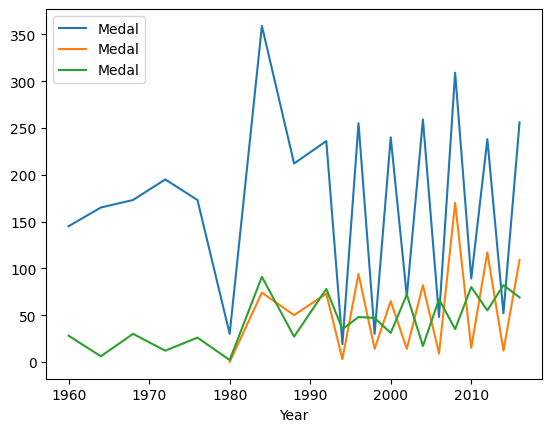

In [19]:
ax = TeamUSAbyYear.plot(y='Medal')
TeamCHNbyYear.plot(ax=ax, y='Medal')
TeamCANbyYear.plot(ax=ax, y='Medal')

plt.show()

In [20]:
CDcountry = dfCD["Country Name"]
display(CDcountry)

0                            Aruba
1      Africa Eastern and Southern
2                      Afghanistan
3       Africa Western and Central
4                           Angola
                  ...             
261                         Kosovo
262                    Yemen, Rep.
263                   South Africa
264                         Zambia
265                       Zimbabwe
Name: Country Name, Length: 266, dtype: object

In [21]:
CDyears = dfCD.iloc[:,5:68]
CDyearsTransposed = CDyears.T
#CDyearsTransposed.columns = ["Year"]
CDyearsTransposed = CDyearsTransposed.drop([1961,1962,1963,1965,1966,1967,1969,1970,1971,1973,1974,1975,1977,1978,1979,1981,1982,1983,1985,1986,1987,1989,1990,1991,1993,1995,1997,1999,2001,2003,2005,2007,2009,2011,2013,2015,2017,2018,2019,2020,2021,2022], axis=0)
CDyearsTransposed

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
1960,NaN,2.112502e+10,5.377778e+08,1.044764e+10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.384857e+12,NaN,NaN,NaN,8.748597e+09,7.130000e+08,1.052990e+09
1964,NaN,2.592067e+10,8.000000e+08,1.389811e+10,NaN,NaN,NaN,NaN,NaN,2.560525e+10,...,NaN,NaN,NaN,1.830492e+12,NaN,NaN,NaN,1.195600e+10,8.394286e+08,1.217138e+09
1968,NaN,3.632779e+10,1.373333e+09,1.496824e+10,NaN,NaN,NaN,3.471540e+10,NaN,2.643686e+10,...,NaN,NaN,NaN,2.484674e+12,NaN,NaN,NaN,1.712479e+10,1.605857e+09,1.479600e+09
1972,NaN,5.312346e+10,1.595555e+09,2.538617e+10,NaN,NaN,1.134144e+08,5.893586e+10,NaN,3.473300e+10,...,NaN,NaN,NaN,3.816823e+12,NaN,NaN,NaN,2.451591e+10,1.872417e+09,2.677729e+09
1976,NaN,9.021275e+10,2.555556e+09,6.235162e+10,NaN,NaN,2.272841e+08,1.955138e+11,1.921316e+10,5.116950e+10,...,NaN,NaN,NaN,6.498746e+12,NaN,NaN,NaN,4.115045e+10,2.742859e+09,4.318372e+09
1980,NaN,1.712178e+11,3.641723e+09,1.124391e+11,5.930503e+09,NaN,4.463776e+08,4.598046e+11,4.359916e+10,7.696192e+10,...,NaN,NaN,1.211855e+08,1.133713e+13,NaN,NaN,NaN,8.941189e+10,3.884531e+09,6.678868e+09
1984,NaN,1.606467e+11,NaN,1.145163e+11,6.131475e+09,1.857338e+09,3.300731e+08,4.258994e+11,4.180795e+10,1.169151e+11,...,NaN,NaN,1.444825e+08,1.231163e+13,1.092009e+08,NaN,NaN,8.487013e+10,2.719519e+09,6.352126e+09
1988,5.966480e+08,2.047660e+11,NaN,1.094389e+11,8.769837e+09,2.051236e+09,7.214260e+08,4.248962e+11,3.627567e+10,1.268902e+11,...,NaN,2.542381e+10,1.583514e+08,1.939402e+13,1.330161e+08,NaN,NaN,1.039769e+11,3.728878e+09,7.814784e+09
1992,9.586592e+08,2.460881e+11,NaN,1.188931e+11,1.511435e+10,6.521750e+08,1.209993e+09,4.738113e+11,5.423917e+10,2.287790e+11,...,NaN,9.866990e+09,2.090888e+08,2.548402e+13,1.323030e+08,NaN,6.463650e+09,1.469561e+11,3.181922e+09,6.751472e+09
1994,1.245810e+09,2.396107e+11,NaN,8.663640e+10,3.390500e+09,1.880951e+09,1.017545e+09,5.077649e+11,5.930509e+10,2.574400e+11,...,NaN,1.628643e+10,2.337013e+08,2.789957e+13,2.210981e+08,NaN,4.167356e+09,1.535127e+11,3.656808e+09,6.890675e+09


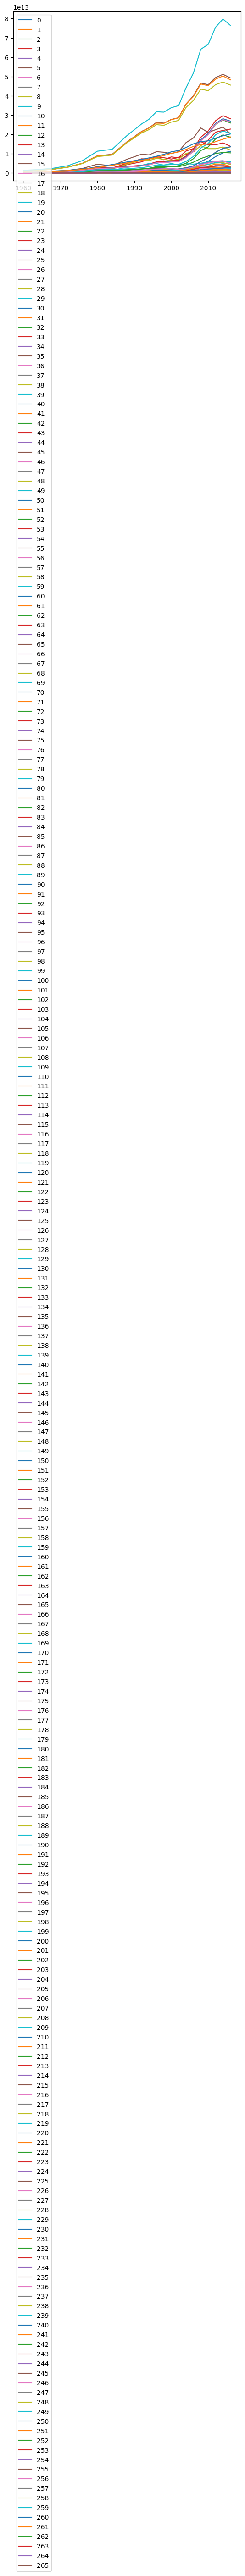

In [22]:
CDyearsTransposed.plot()

plt.show()

In [23]:
chinaGDP = dfCD.loc[dfCD['Country Name'] == "China"]

chinaGDPT = chinaGDP.T

chinaGDPT = chinaGDPT.drop(index=['Year', 'Country Code', 'Indicator Name', 'Indicator Code'])

chinaGDPT.columns = chinaGDPT.iloc[0]

chinaGDPT = chinaGDPT.drop(index=['Country Name'])

chinaGDPT = chinaGDPT.drop([1961,1962,1963,1965,1966,1967,1969,1970,1971,1973,1974,1975,1977,1978,1979,1981,1982,1983,1985,1986,1987,1989,1990,1991,1993,1995,1997,1999,2001,2003,2005,2007,2009,2011,2013,2015,2017,2018,2019,2020,2021,2022], axis=0)

display(chinaGDPT)

Country Name,China
1960,59716251765.175598
1964,59708127657.731796
1968,70846278963.092804
1972,113689285303.376999
1976,153939238114.518005
1980,191149211575.0
1984,259946510957.143005
1988,312353631207.81897
1992,426915712715.856018
1994,564321876346.386963


In [24]:
usaGDP = dfCD.loc[dfCD['Country Name'] == "United States"]

usaGDPT = usaGDP.T

usaGDPT = usaGDPT.drop(index=['Year', 'Country Code', 'Indicator Name', 'Indicator Code'])

usaGDPT.columns = usaGDPT.iloc[0]

usaGDPT = usaGDPT.drop(index=['Country Name'])

usaGDPT = usaGDPT.drop([1961,1962,1963,1965,1966,1967,1969,1970,1971,1973,1974,1975,1977,1978,1979,1981,1982,1983,1985,1986,1987,1989,1990,1991,1993,1995,1997,1999,2001,2003,2005,2007,2009,2011,2013,2015,2017,2018,2019,2020,2021,2022], axis=0)

display(usaGDPT)

Country Name,United States
1960,543300000000.0
1964,685800000000.0
1968,942500000000.0
1972,1279110000000.0
1976,1873412000000.0
1980,2857307000000.0
1984,4037613000000.0
1988,5236438000000.0
1992,6520327000000.0
1994,7287236000000.0


In [25]:
canGDP = dfCD.loc[dfCD['Country Name'] == "Canada"]

canGDPT = canGDP.T

canGDPT = canGDPT.drop(index=['Year', 'Country Code', 'Indicator Name', 'Indicator Code'])

canGDPT.columns = canGDPT.iloc[0]

canGDPT = canGDPT.drop(index=['Country Name'])

canGDPT = canGDPT.drop([1961,1962,1963,1965,1966,1967,1969,1970,1971,1973,1974,1975,1977,1978,1979,1981,1982,1983,1985,1986,1987,1989,1990,1991,1993,1995,1997,1999,2001,2003,2005,2007,2009,2011,2013,2015,2017,2018,2019,2020,2021,2022], axis=0)

display(canGDPT)

Country Name,Canada
1960,40462398501.885803
1964,49377963148.978104
1968,71830047239.013901
1972,113463848873.623993
1976,207265662814.815002
1980,274770252171.761993
1984,356727872422.40802
1988,509379677196.070984
1992,594376087449.387939
1994,579944346807.264038


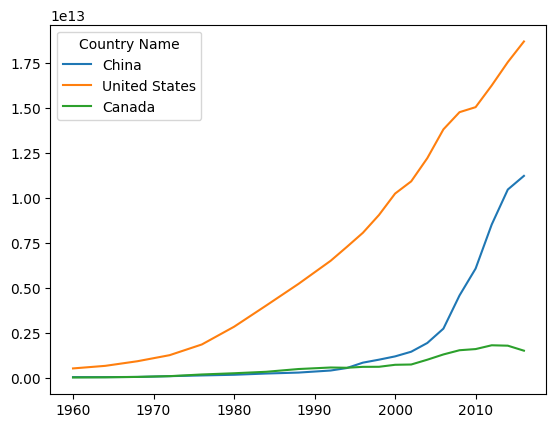

In [26]:

ax = chinaGDPT.plot()
usaGDPT.plot(ax=ax)
canGDPT.plot(ax=ax)

plt.show()

In [27]:
TeamsbyYear = pd.concat([TeamCHNbyYear, TeamUSAbyYear, TeamCANbyYear], axis=1)
TeamsbyYear = TeamsbyYear.sort_values(["Year"])
display(TeamsbyYear)

,Medal,Medal,Medal
Year,,,
1960,NaN,145.0,28.0
1964,NaN,165.0,6.0
1968,NaN,173.0,30.0
1972,NaN,195.0,12.0
1976,NaN,173.0,26.0
1980,0.0,30.0,2.0
1984,74.0,359.0,91.0
1988,50.0,212.0,27.0
1992,73.0,236.0,78.0


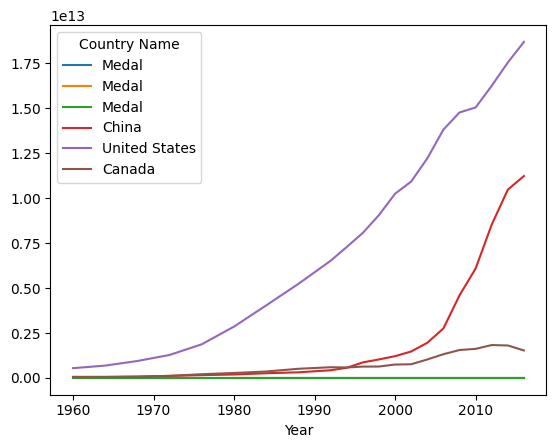

In [28]:


ax = TeamUSAbyYear.plot(y='Medal')
TeamCHNbyYear.plot(ax=ax, y='Medal')
TeamCANbyYear.plot(ax=ax, y='Medal')
chinaGDPT.plot(ax=ax)
usaGDPT.plot(ax=ax)
canGDPT.plot(ax=ax)

plt.show()

In [29]:
Max_Scale = TeamsbyYear.copy()
for column in Max_Scale.columns:
    Max_Scale[column] = Max_Scale[column]  / Max_Scale[column].abs().max()

display(Max_Scale)

,Medal,Medal,Medal
Year,,,
1960,NaN,0.403900,0.307692
1964,NaN,0.459610,0.065934
1968,NaN,0.481894,0.329670
1972,NaN,0.543175,0.131868
1976,NaN,0.481894,0.285714
1980,0.000000,0.083565,0.021978
1984,0.435294,1.000000,1.000000
1988,0.294118,0.590529,0.296703
1992,0.429412,0.657382,0.857143


<Axes: xlabel='Year'>

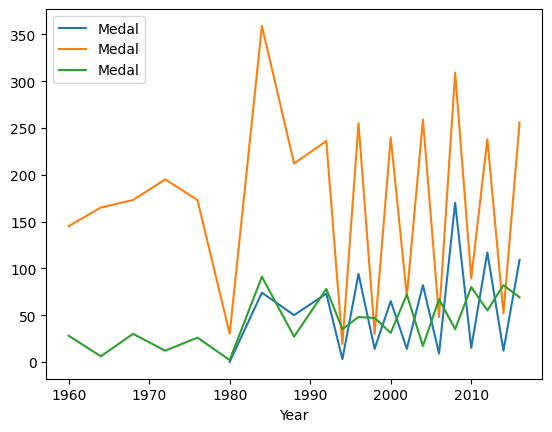

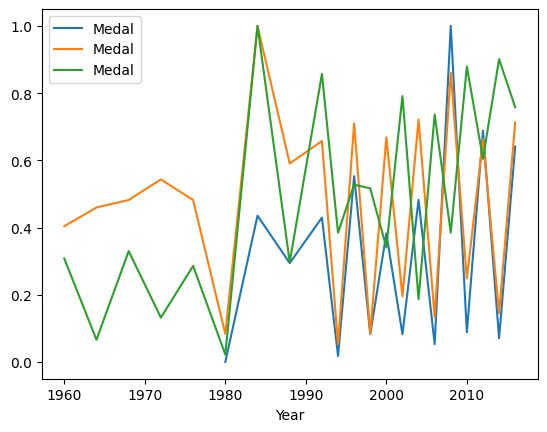

In [30]:
TeamsbyYear.plot(y = 'Medal')
Max_Scale.plot(y = "Medal")

In [31]:
GDPbyYear = pd.concat([chinaGDPT, usaGDPT, canGDPT], axis=1)
display(GDPbyYear)

Country Name,China,United States,Canada
1960,59716251765.175598,543300000000.0,40462398501.885803
1964,59708127657.731796,685800000000.0,49377963148.978104
1968,70846278963.092804,942500000000.0,71830047239.013901
1972,113689285303.376999,1279110000000.0,113463848873.623993
1976,153939238114.518005,1873412000000.0,207265662814.815002
1980,191149211575.0,2857307000000.0,274770252171.761993
1984,259946510957.143005,4037613000000.0,356727872422.40802
1988,312353631207.81897,5236438000000.0,509379677196.070984
1992,426915712715.856018,6520327000000.0,594376087449.387939
1994,564321876346.386963,7287236000000.0,579944346807.264038


In [32]:
Max_Scale_GDP = GDPbyYear.copy()
for column in Max_Scale_GDP.columns:
    Max_Scale_GDP[column] = Max_Scale_GDP[column]  / Max_Scale_GDP[column].abs().max()

display(Max_Scale_GDP)

Country Name,China,United States,Canada
1960,0.005316,0.029061,0.02213
1964,0.005315,0.036683,0.027007
1968,0.006307,0.050414,0.039286
1972,0.010121,0.068419,0.062057
1976,0.013704,0.100209,0.113361
1980,0.017016,0.152837,0.150282
1984,0.023141,0.215972,0.195107
1988,0.027806,0.280097,0.278598
1992,0.038004,0.348772,0.325086
1994,0.050236,0.389794,0.317193


<Axes: >

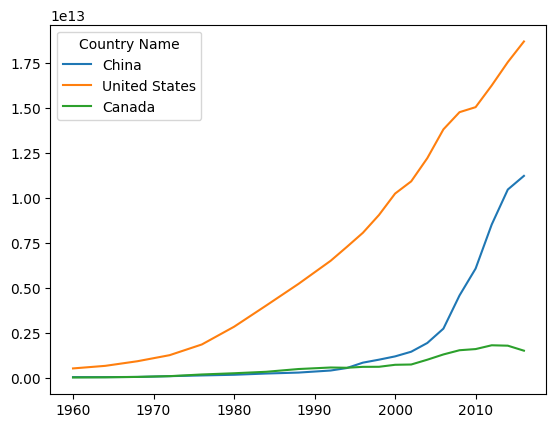

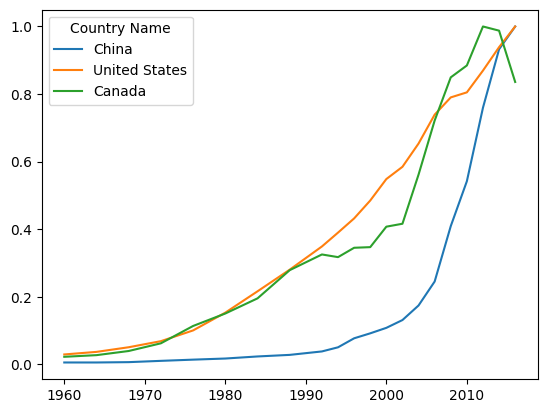

In [33]:
GDPbyYear.plot()
Max_Scale_GDP.plot()

<Axes: >

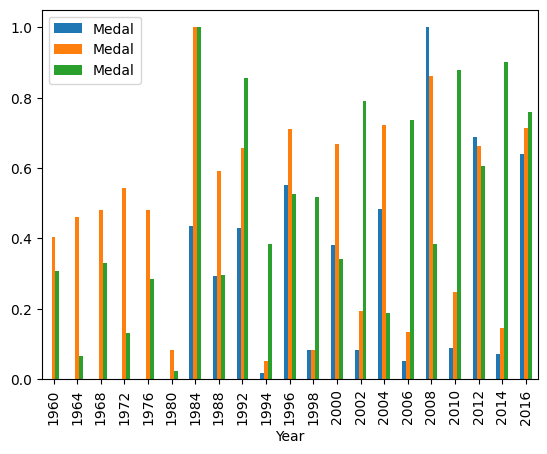

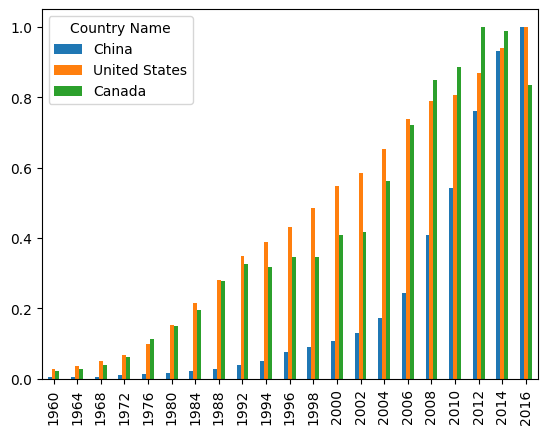

In [34]:
Max_Scale.plot.bar()
Max_Scale_GDP.plot.bar()

In [52]:
CombinedData = pd.concat([TeamCHNbyYear, TeamUSAbyYear, TeamCANbyYear, chinaGDPT, usaGDPT, canGDPT], axis=1)
CombinedData = CombinedData.sort_index()
CombinedData['Medal'] = CombinedData['Medal'].fillna(0)
display(CombinedData)

,Medal,Medal,Medal,China,United States,Canada
1960,0.0,145.0,28.0,59716251765.175598,543300000000.0,40462398501.885803
1964,0.0,165.0,6.0,59708127657.731796,685800000000.0,49377963148.978104
1968,0.0,173.0,30.0,70846278963.092804,942500000000.0,71830047239.013901
1972,0.0,195.0,12.0,113689285303.376999,1279110000000.0,113463848873.623993
1976,0.0,173.0,26.0,153939238114.518005,1873412000000.0,207265662814.815002
1980,0.0,30.0,2.0,191149211575.0,2857307000000.0,274770252171.761993
1984,74.0,359.0,91.0,259946510957.143005,4037613000000.0,356727872422.40802
1988,50.0,212.0,27.0,312353631207.81897,5236438000000.0,509379677196.070984
1992,73.0,236.0,78.0,426915712715.856018,6520327000000.0,594376087449.387939
1994,3.0,19.0,35.0,564321876346.386963,7287236000000.0,579944346807.264038


In [53]:
Max_Scale_Data = CombinedData.copy()
for column in Max_Scale_Data.columns:
    Max_Scale_Data[column] = Max_Scale_Data[column]  / Max_Scale_Data[column].abs().max()

display(Max_Scale_Data)

,Medal,Medal,Medal,China,United States,Canada
1960,0.000000,0.403900,0.307692,0.005316,0.029061,0.02213
1964,0.000000,0.459610,0.065934,0.005315,0.036683,0.027007
1968,0.000000,0.481894,0.329670,0.006307,0.050414,0.039286
1972,0.000000,0.543175,0.131868,0.010121,0.068419,0.062057
1976,0.000000,0.481894,0.285714,0.013704,0.100209,0.113361
1980,0.000000,0.083565,0.021978,0.017016,0.152837,0.150282
1984,0.435294,1.000000,1.000000,0.023141,0.215972,0.195107
1988,0.294118,0.590529,0.296703,0.027806,0.280097,0.278598
1992,0.429412,0.657382,0.857143,0.038004,0.348772,0.325086
1994,0.017647,0.052925,0.384615,0.050236,0.389794,0.317193


<Axes: >

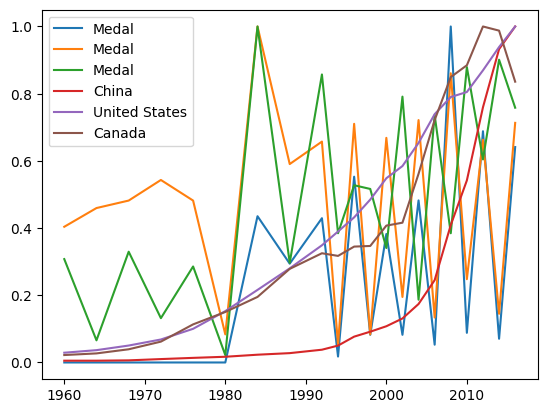

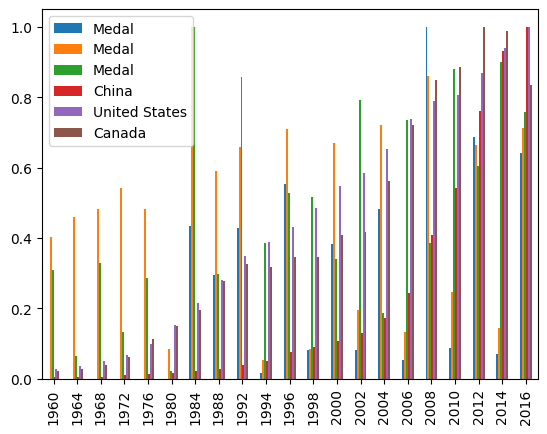

In [54]:
Max_Scale_Data.plot()
Max_Scale_Data.plot.bar()

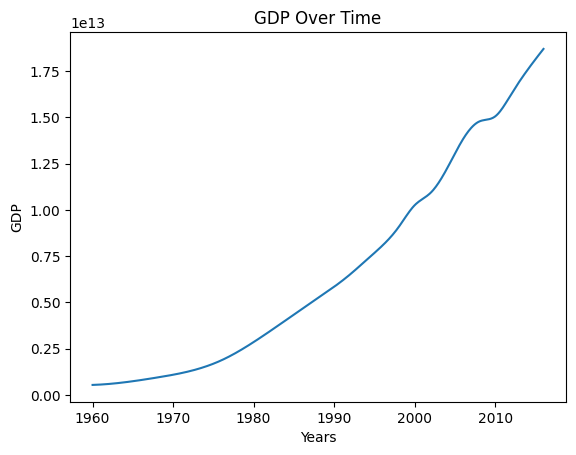

In [55]:
import numpy as np
from scipy.interpolate import make_interp_spline

y = np.array(usaGDPT['United States'])
x = np.array(Years)
X_Y_Spline = make_interp_spline(x, y)

X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)

plt.plot(X_, Y_)
plt.title("GDP Over Time")
plt.xlabel("Years")
plt.ylabel("GDP")
plt.show()

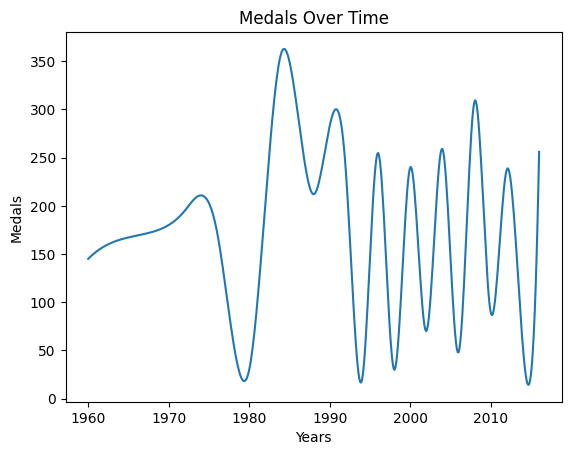

In [39]:
y = np.array(TeamUSAbyYear['Medal'])
x = np.array(Years)
X_Y_Spline = make_interp_spline(x, y)

X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)

plt.plot(X_, Y_)
plt.title("Medals Over Time")
plt.xlabel("Years")
plt.ylabel("Medals")
plt.show()

In [40]:
usa = pd.concat([TeamUSAbyYear, usaGDPT], axis=1)
usa = usa.sort_index()
display(usa)

,Medal,United States
1960,145.0,543300000000.0
1964,165.0,685800000000.0
1968,173.0,942500000000.0
1972,195.0,1279110000000.0
1976,173.0,1873412000000.0
1980,30.0,2857307000000.0
1984,359.0,4037613000000.0
1988,212.0,5236438000000.0
1992,236.0,6520327000000.0
1994,19.0,7287236000000.0


In [41]:
Max_Scale_USA = usa.copy()
for column in Max_Scale_USA.columns:
    Max_Scale_USA[column] = Max_Scale_USA[column]  / Max_Scale_USA[column].abs().max()

display(Max_Scale_USA)

,Medal,United States
1960,0.403900,0.029061
1964,0.459610,0.036683
1968,0.481894,0.050414
1972,0.543175,0.068419
1976,0.481894,0.100209
1980,0.083565,0.152837
1984,1.000000,0.215972
1988,0.590529,0.280097
1992,0.657382,0.348772
1994,0.052925,0.389794


<Axes: >

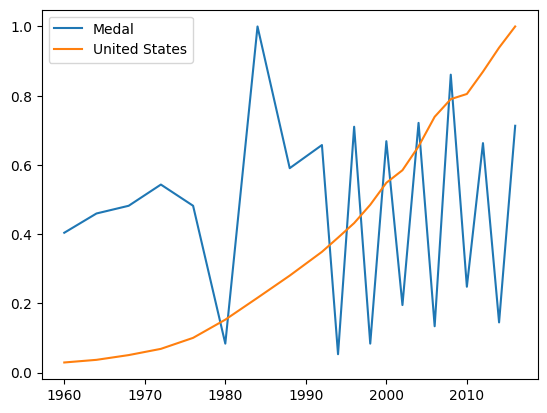

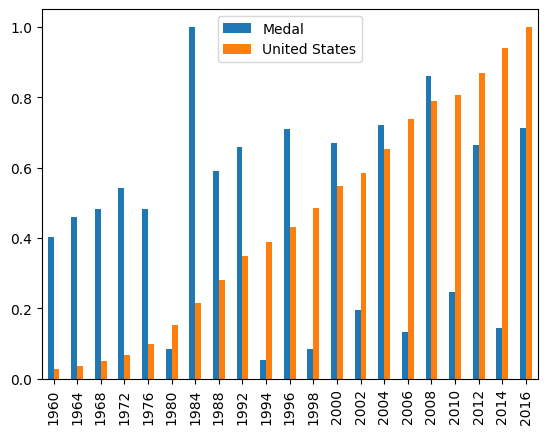

In [42]:
Max_Scale_USA.plot()
Max_Scale_USA.plot.bar()

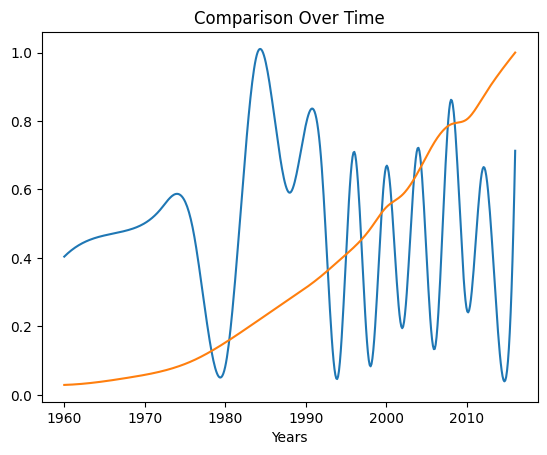

In [43]:
y1 = np.array(Max_Scale_USA['Medal'])
y2 = np.array(Max_Scale_USA['United States'])
x = np.array(Years)
X_Y_Spline1 = make_interp_spline(x, y1)
X_Y_Spline2 = make_interp_spline(x, y2)

X_ = np.linspace(x.min(), x.max(), 500)
Y_1 = X_Y_Spline1(X_)
Y_2 = X_Y_Spline2(X_)

plt.plot(X_, Y_1)
plt.plot(X_, Y_2)
plt.title("Comparison Over Time")
plt.xlabel("Years")
plt.show()

In [44]:
can = pd.concat([TeamCANbyYear, canGDPT], axis=1)
can = can.sort_index()
display(can)

,Medal,Canada
1960,28.0,40462398501.885803
1964,6.0,49377963148.978104
1968,30.0,71830047239.013901
1972,12.0,113463848873.623993
1976,26.0,207265662814.815002
1980,2.0,274770252171.761993
1984,91.0,356727872422.40802
1988,27.0,509379677196.070984
1992,78.0,594376087449.387939
1994,35.0,579944346807.264038


In [45]:
Max_Scale_CAN = can.copy()
for column in Max_Scale_CAN.columns:
    Max_Scale_CAN[column] = Max_Scale_CAN[column]  / Max_Scale_CAN[column].abs().max()

display(Max_Scale_CAN)

,Medal,Canada
1960,0.307692,0.02213
1964,0.065934,0.027007
1968,0.329670,0.039286
1972,0.131868,0.062057
1976,0.285714,0.113361
1980,0.021978,0.150282
1984,1.000000,0.195107
1988,0.296703,0.278598
1992,0.857143,0.325086
1994,0.384615,0.317193


<Axes: >

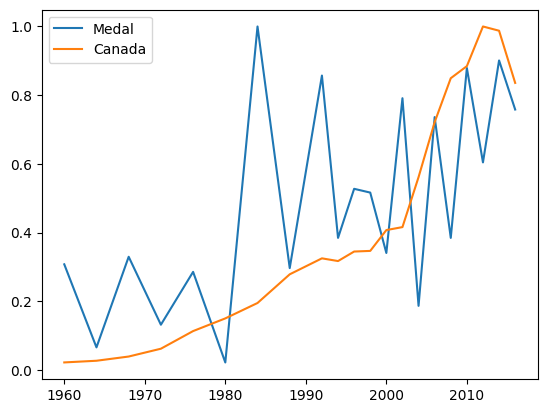

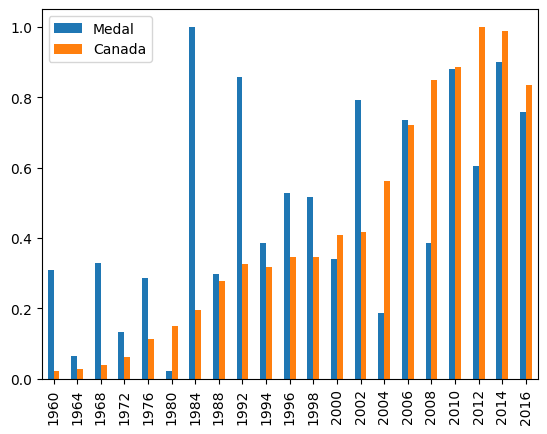

In [46]:
Max_Scale_CAN.plot()
Max_Scale_CAN.plot.bar()

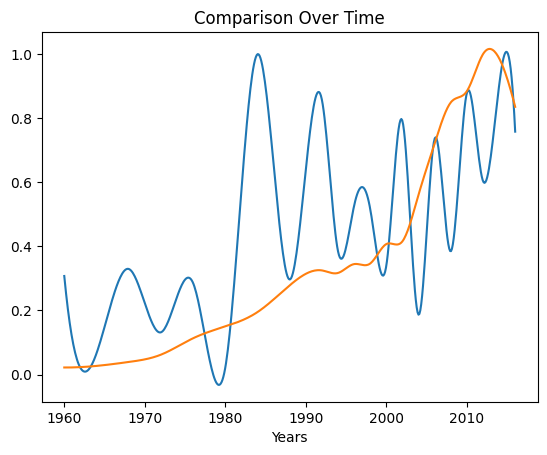

In [47]:
y1 = np.array(Max_Scale_CAN['Medal'])
y2 = np.array(Max_Scale_CAN['Canada'])
x = np.array(Years)
X_Y_Spline1 = make_interp_spline(x, y1)
X_Y_Spline2 = make_interp_spline(x, y2)

X_ = np.linspace(x.min(), x.max(), 500)
Y_1 = X_Y_Spline1(X_)
Y_2 = X_Y_Spline2(X_)

plt.plot(X_, Y_1)
plt.plot(X_, Y_2)
plt.title("Comparison Over Time")
plt.xlabel("Years")
plt.show()

In [58]:
chn = pd.concat([TeamCHNbyYear, chinaGDPT], axis=1)
chn = chn.sort_index()
chn['Medal'] = chn['Medal'].fillna(0)
display(chn)

,Medal,China
1960,0.0,59716251765.175598
1964,0.0,59708127657.731796
1968,0.0,70846278963.092804
1972,0.0,113689285303.376999
1976,0.0,153939238114.518005
1980,0.0,191149211575.0
1984,74.0,259946510957.143005
1988,50.0,312353631207.81897
1992,73.0,426915712715.856018
1994,3.0,564321876346.386963


In [59]:
Max_Scale_CHN = chn.copy()
for column in Max_Scale_CHN.columns:
    Max_Scale_CHN[column] = Max_Scale_CHN[column]  / Max_Scale_CHN[column].abs().max()

display(Max_Scale_CHN)

,Medal,China
1960,0.000000,0.005316
1964,0.000000,0.005315
1968,0.000000,0.006307
1972,0.000000,0.010121
1976,0.000000,0.013704
1980,0.000000,0.017016
1984,0.435294,0.023141
1988,0.294118,0.027806
1992,0.429412,0.038004
1994,0.017647,0.050236


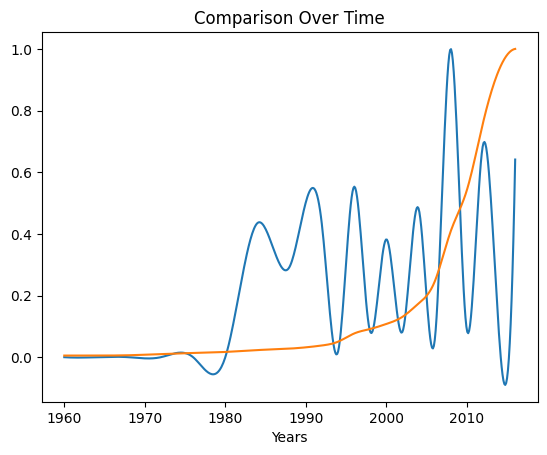

In [60]:
y1 = np.array(Max_Scale_CHN['Medal'])
y2 = np.array(Max_Scale_CHN['China'])
x = np.array(Years)
X_Y_Spline1 = make_interp_spline(x, y1)
X_Y_Spline2 = make_interp_spline(x, y2)

X_ = np.linspace(x.min(), x.max(), 500)
Y_1 = X_Y_Spline1(X_)
Y_2 = X_Y_Spline2(X_)

plt.plot(X_, Y_1)
plt.plot(X_, Y_2)
plt.title("Comparison Over Time")
plt.xlabel("Years")
plt.show()

In [48]:
Teamkor = ODcountry_year.loc[dfOD["Team"] == "South Korea"]
Teamkor = Teamkor.loc[Teamkor['Year'] > 1959]
Teamkor = Teamkor.reset_index(drop=True)

display(Teamkor)

TeamkorbyYear = Teamkor.groupby(by=["Year"]).sum()
display(TeamkorbyYear)

KoreaGDP = dfCD.loc[dfCD['Country Name'] == "Korea, Rep."]

KoreaGDPT = KoreaGDP.T

KoreaGDPT = KoreaGDPT.drop(index=['Year', 'Country Code', 'Indicator Name', 'Indicator Code'])

KoreaGDPT.columns = KoreaGDPT.iloc[0]

KoreaGDPT = KoreaGDPT.drop(index=['Country Name'])

KoreaGDPT = KoreaGDPT.drop([1961,1962,1963,1965,1966,1967,1969,1970,1971,1973,1974,1975,1977,1978,1979,1981,1982,1983,1985,1986,1987,1989,1990,1991,1993,1995,1997,1999,2001,2003,2005,2007,2009,2011,2013,2015,2017,2018,2019,2020,2021,2022], axis=0)

display(KoreaGDPT)

sk = pd.concat([TeamkorbyYear, KoreaGDPT], axis=1)
sk = sk.sort_index()
display(sk)

Max_Scale_SK = sk.copy()
for column in Max_Scale_SK.columns:
    Max_Scale_SK[column] = Max_Scale_SK[column]  / Max_Scale_SK[column].abs().max()

display(Max_Scale_SK)

,Team,Year,Medal
0,South Korea,1992,NaN
1,South Korea,1992,NaN
2,South Korea,1992,NaN
3,South Korea,1992,NaN
4,South Korea,1994,NaN
...,...,...,...
4216,South Korea,1988,1.0
4217,South Korea,1988,1.0
4218,South Korea,1988,NaN
4219,South Korea,1996,NaN


<ipython-input-48-e3db1c28e6c4>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  TeamkorbyYear = Teamkor.groupby(by=["Year"]).sum()


,Medal
Year,
1960,0.0
1964,3.0
1968,2.0
1972,1.0
1976,17.0
1980,0.0
1984,41.0
1988,75.0
1992,44.0


Country Name,"Korea, Rep."
1960,3958824423.99818
1964,3459032883.02465
1968,6119284294.23459
1972,10862327878.032
1976,29902479338.842999
1980,65398646757.6511
1984,97510235986.004593
1988,199590823957.237
1992,355525267405.367004
1994,463617399962.661011


,Medal,"Korea, Rep."
1960,0.0,3958824423.99818
1964,3.0,3459032883.02465
1968,2.0,6119284294.23459
1972,1.0,10862327878.032
1976,17.0,29902479338.842999
1980,0.0,65398646757.6511
1984,41.0,97510235986.004593
1988,75.0,199590823957.237
1992,44.0,355525267405.367004
1994,9.0,463617399962.661011


,Medal,"Korea, Rep."
1960,0.000000,0.002639
1964,0.040000,0.002306
1968,0.026667,0.004079
1972,0.013333,0.007241
1976,0.226667,0.019934
1980,0.000000,0.043596
1984,0.546667,0.065002
1988,1.000000,0.133051
1992,0.586667,0.236999
1994,0.120000,0.309055


<Axes: >

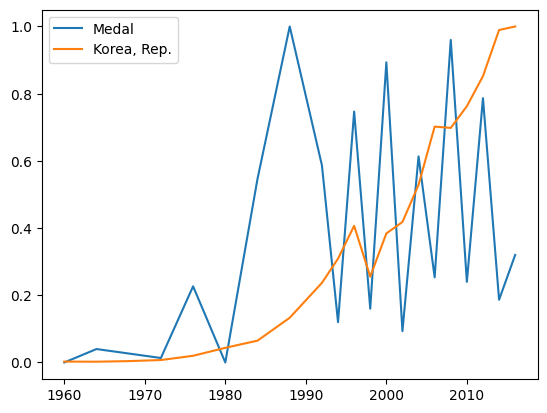

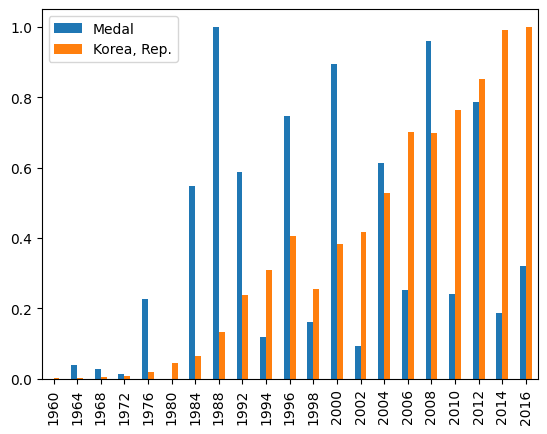

In [49]:
Max_Scale_SK.plot()
Max_Scale_SK.plot.bar()

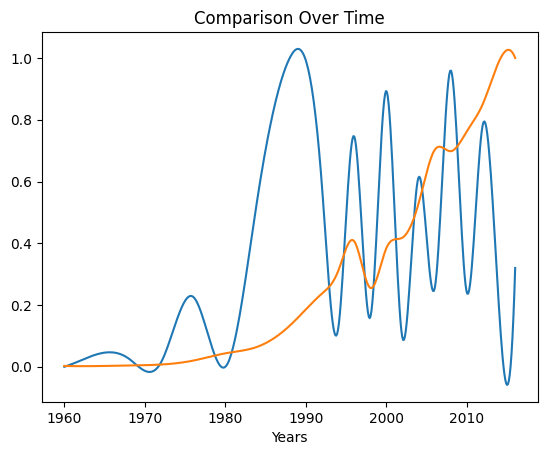

In [50]:
y1 = np.array(Max_Scale_SK['Medal'])
y2 = np.array(Max_Scale_SK['Korea, Rep.'])
x = np.array(Years)
X_Y_Spline1 = make_interp_spline(x, y1)
X_Y_Spline2 = make_interp_spline(x, y2)

X_ = np.linspace(x.min(), x.max(), 500)
Y_1 = X_Y_Spline1(X_)
Y_2 = X_Y_Spline2(X_)

plt.plot(X_, Y_1)
plt.plot(X_, Y_2)
plt.title("Comparison Over Time")
plt.xlabel("Years")
plt.show()

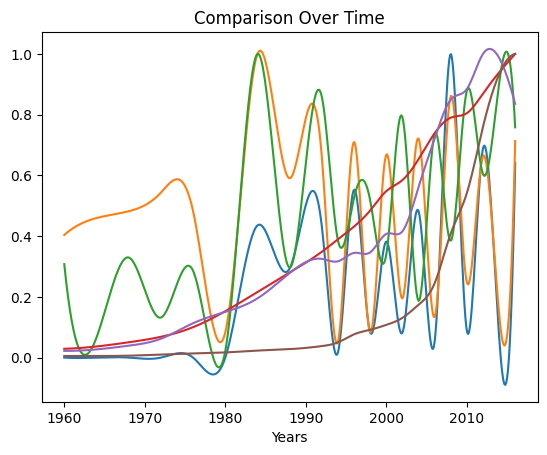

In [56]:
y1 = np.array(Max_Scale_Data['Medal'])
y2 = np.array(Max_Scale_Data['United States'])
y3 = np.array(Max_Scale_Data['China'])
y4 = np.array(Max_Scale_Data['Canada'])
x = np.array(Years)
X_Y_Spline1 = make_interp_spline(x, y1)
X_Y_Spline2 = make_interp_spline(x, y2)
X_Y_Spline3 = make_interp_spline(x, y3)
X_Y_Spline4 = make_interp_spline(x, y4)


X_ = np.linspace(x.min(), x.max(), 500)
Y_1 = X_Y_Spline1(X_)
Y_2 = X_Y_Spline2(X_)
Y_3 = X_Y_Spline3(X_)
Y_4 = X_Y_Spline4(X_)

plt.plot(X_, Y_1)
plt.plot(X_, Y_2)
plt.plot(X_, Y_4)
plt.plot(X_, Y_3)
plt.title("Comparison Over Time")
plt.xlabel("Years")
plt.show()

